In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import natsort
import GrowthAssayPlotlib

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
USE_MULTIINVASION = False

if USE_MULTIINVASION:
    ga3_file = 'GA3 parasitemia multiinvasion.xlsx'
    column_title_row = 0
    OUTPUT_FOLDER = 'Graph Multiinvasion'

else:
    ga3_file = 'GA3 parasitemia.xlsx'
    column_title_row = 3
    OUTPUT_FOLDER = ''


df3 = GrowthAssayPlotlib.load_file(ga3_file, column_title_row)

df3_melted_replicas = GrowthAssayPlotlib.melt_df(df3, id_vars=['Plate number', 'Well position', 'Line', 'Clone', 'Strain', 'Speed', 'Plate'])

df3_melted_replicas.head()


Loading GA3 parasitemia.xlsx
['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12']
Repeat 1 = Day 2 / Day 1, Parasitemia 1 = Day 1
Repeat 2 = Day 4 / Day 3, Parasitemia 2 = Day 3
Repeat 3 = Day 6 / Day 5, Parasitemia 3 = Day 5
Repeat 4 = Day 8 / Day 7, Parasitemia 4 = Day 7
Repeat 5 = Day 10 / Day 9, Parasitemia 5 = Day 9
Repeat 6 = Day 12 / Day 11, Parasitemia 6 = Day 11


,Plate number,Well position,Line,Clone,Strain,Speed,Plate,Repeat,Invasion rate,Parasitemia
0,1,A1,NF54,,NF54,Static,6-well,Repeat 1,4.296296,0.378
1,2,A2,Dd2,,Dd2,Static,6-well,Repeat 1,5.550847,0.236
2,3,A3,NF54,,NF54,Static,6-well,Repeat 1,4.169312,0.378
3,4,A4,Dd2,,Dd2,Static,6-well,Repeat 1,5.605932,0.236
4,5,A5,NF54,,NF54,Static,6-well,Repeat 1,3.828042,0.378


In [4]:
# plot all 
MAX_INVASION_RATE_PLOT = 25
output_folder_ga3 = GrowthAssayPlotlib.get_output_folder('GA3', OUTPUT_FOLDER)

#Excluding ones that have crashed
EXCLUDE_WELL_POSITIONS = [
    'C8', 'C10', 'C12',
    'D2', 'D4', 'D6',
    'D1', 'D3', 'D5',
]
EXCLUDE_WELL_POSITION_REPEATS = [
    'Repeat 5',
    'Repeat 6',
]


df3_melted_replicas_filtered = GrowthAssayPlotlib.filter_dataframe(
    df=df3_melted_replicas,
    ignore_repeats=[
        'Repeat 1',
        'Repeat 3',
    ],
    filter_list_filename='GA3 filtered.csv',
)
df3_melted_replicas_filtered = df3_melted_replicas_filtered.query('not (`Well position` == @EXCLUDE_WELL_POSITIONS and `Repeat` == @EXCLUDE_WELL_POSITION_REPEATS)')

df3_melted_replicas_marked = GrowthAssayPlotlib.mark_dataframe(df3_melted_replicas, ignore_repeats=['Repeat 1', 'Repeat 3'])
df3_melted_replicas_marked = df3_melted_replicas_marked.query('not (`Well position` == @EXCLUDE_WELL_POSITIONS and `Repeat` == @EXCLUDE_WELL_POSITION_REPEATS)')
# TODO: mark these as well?

# group replicas per repeat
df3_melted_grouped = GrowthAssayPlotlib.group_repeats(
    df_melted_replicas_filtered = df3_melted_replicas_filtered,
    group_keys=['Line', 'Speed', 'Repeat', 'Strain', 'Clone', 'Plate'],
)

df3_melted = df3_melted_replicas_filtered

df3_melted.to_json('GA3_df_melted.json')

# GrowthAssayPlotlib.plot_repeats_for_line(df3_melted_replicas_filtered, MAX_INVASION_RATE_PLOT, output_folder_ga3)
# GrowthAssayPlotlib.plot_repeats_for_wells(df3_melted_replicas_filtered, MAX_INVASION_RATE_PLOT, output_folder_ga3)
# GrowthAssayPlotlib.plot_parasimetia_vs_invasion_rate(df3_melted_replicas, ['Line', 'Speed', 'Plate'], output_folder=output_folder_ga3)
# for label, df_plot in [('with replicas', df3_melted_replicas), ('averaged replicas', df3_melted)]:
#     GrowthAssayPlotlib.plot_line(df_plot, label, MAX_INVASION_RATE_PLOT, output_folder_ga3)
#     GrowthAssayPlotlib.plot_speed(df_plot, label, MAX_INVASION_RATE_PLOT, output_folder_ga3)

(4, "D7"),
(8, "B8"),
(8, "B9"),
(8, "C7"),
(8, "C8"),
(8, "C9"),
(8, "C10"),
(8, "C11"),
(8, "C12"),
(8, "D1"),
(8, "D2"),
(8, "D3"),
(8, "D4"),
(8, "D5"),
(8, "D6"),
(8, "D7"),
(8, "D8"),
(8, "D10"),
(8, "F3"),
(8, "G1"),
(8, "G4"),
(8, "G5"),
(8, "H10"),
(8, "H11"),
(8, "H12"),
(10, "B10"),
(10, "C2"),
(10, "C4"),
(10, "C6"),
(10, "D10"),
(10, "F2"),
(10, "F3"),
(10, "F4"),
(10, "F5"),
(10, "F10"),
(10, "G2"),
(10, "G5"),
(10, "G6"),
(10, "G12"),
(10, "H4"),
(10, "H10"),
(10, "H11"),
(10, "H12"),
(12, "B10"),
(12, "C6"),
(12, "C11"),
(12, "D10"),
(12, "E1"),
(12, "F2"),
(12, "F4"),
(12, "F5"),
(12, "F8"),
(12, "F11"),
(12, "F12"),
(12, "G1"),
(12, "G2"),
(12, "G4"),
(12, "G5"),
(12, "G6"),
(12, "G8"),
(12, "G10"),
(12, "G12"),
(12, "H2"),
(12, "H4"),
(12, "H6"),
(12, "H7"),
(12, "H10"),
(12, "H11"),
(12, "H12"),


In [5]:
df3_melted_replicas_filtered

,Plate number,Well position,Line,Clone,Strain,Speed,Plate,Repeat,Invasion rate,Parasitemia
96,1,A1,NF54,,NF54,Static,6-well,Repeat 2,6.742857,0.315
97,2,A2,Dd2,,Dd2,Static,6-well,Repeat 2,20.245714,0.175
98,3,A3,NF54,,NF54,Static,6-well,Repeat 2,7.990798,0.326
99,4,A4,Dd2,,Dd2,Static,6-well,Repeat 2,19.890909,0.165
100,5,A5,NF54,,NF54,Static,6-well,Repeat 2,5.915698,0.344
...,...,...,...,...,...,...,...,...,...,...
564,85,H1,NF54,,NF54,180-rpm,96-well,Repeat 6,3.469799,0.298
566,87,H3,NF54,,NF54,180-rpm,96-well,Repeat 6,3.930769,0.650
568,89,H5,NF54,,NF54,180-rpm,96-well,Repeat 6,3.180212,0.566
571,92,H8,NF54,,NF54,180-rpm,50ml flask,Repeat 6,5.624413,0.852


In [6]:
# GrowthAssayPlotlib.plot_pretty_barplot(
#     df=df3_melted,
#     plot_clones=False, # or 'Line' if you want clones to show separatley
#     output_folder=output_folder_ga3,
# )
# GrowthAssayPlotlib.plot_pretty_barplot(
#     df=df3_melted,
#     plot_clones=True, # or 'Line' if you want clones to show separatley
#     output_folder=output_folder_ga3,
# )

# clone_list = [
#     'KOEBA181 C1',
#     'KORH4 C1',
#     'KOEBA140 C4', 
#     'KOEBA175 C6',
#     'KORH2a C3',
#     'KORh1 C2',
#     'KOPfs25 C1',
#     'KOP230P C3',
# ]
# dfq = df3_melted.query('Line == @clone_list')
# GrowthAssayPlotlib.plot_pretty_barplot(
#     df=dfq,
#     plot_clones=True, # or 'Line' if you want clones to show separatley
#     output_folder=output_folder_ga3,
# )


In [7]:
# GrowthAssayPlotlib.ga1_plot_together(
#     df=df1_melted, 
#     plot_clones=False, 
#     output_folder=output_folder_ga1,
# )
# GrowthAssayPlotlib.ga1_plot_together(
#     df=dfq, 
#     plot_clones=True, 
#     output_folder=output_folder_ga1,
# )

In [8]:
GrowthAssayPlotlib.significance_testing(
    df=df3_melted_grouped, 
    group_keys=['Line', 'Speed','Plate'],
    wildtype='NF54',
    line_key='Line',
)


Testing Line for 180-rpm, 24-well.
   - NF54 and Dd2         : ttest p-value = 0.6457, not
Testing Line for 180-rpm, 50ml flask.
   - NF54 and Dd2         : ranksums = 0.1573, not
Testing Line for 180-rpm, 6-well.
   - NF54 and Dd2         : ttest p-value = 0.7070, not
Testing Line for 180-rpm, 96-well.
   - NF54 and Dd2         : ttest p-value = 0.2067, not
Testing Line for 45-rpm, 24-well.
   - NF54 and Dd2         : ttest p-value = 0.0001, significant
Testing Line for 45-rpm, 50ml flask.
   - NF54 and Dd2         : ttest p-value = 0.1361, not
Testing Line for 45-rpm, 6-well.
   - NF54 and Dd2         : ttest p-value = 0.0000, significant
Testing Line for 45-rpm, 96-well.
   - NF54 and Dd2         : ttest p-value = 0.0008, significant
Testing Line for 90-rpm, 24-well.
   - NF54 and Dd2         : ranksums = 0.1797, not
Testing Line for 90-rpm, 50ml flask.
   - NF54 and Dd2         : ttest p-value = 0.7858, not
Testing Line for 90-rpm, 6-well.
   - NF54 and Dd2         : ttest p-value

In [9]:
sns.set_theme(#context='notebook', 
            #style='ticks', 
            style='darkgrid', 
            font='arial', 
            font_scale=1) 
            #   color_codes=True, 
            #   rc=None)
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

df3_melted.dropna(inplace=True)

print(df3_melted.head())

for label, df_plot in [('with replicas', df3_melted_replicas_filtered), ('averaged replicas', df3_melted)]:
    for plate, dfg in df_plot.groupby('Plate'):
        plt.figure(figsize=(6,4), dpi=300)
        sns.boxplot(x='Speed', y='Invasion rate', data=dfg, order=GrowthAssayPlotlib.speed_order, hue='Line', palette='rocket')
        sns.swarmplot(x='Speed', y='Invasion rate', data=dfg, order=GrowthAssayPlotlib.speed_order, hue='Line', color='black', dodge=True, size=5)
        plt.title(plate)
        plt.ylim((0,MAX_INVASION_RATE_PLOT))
        plt.savefig(os.path.join(output_folder_ga3, f'Plate {plate} {label}.{GrowthAssayPlotlib.EXTENSION}'), bbox_inches='tight')
        plt.close()

    for speed, dfg in df_plot.groupby('Speed'):
        plt.figure(figsize=(6,4), dpi=300)
        plates = dfg['Plate'].unique()
        sns.boxplot(x='Plate', y='Invasion rate', data=dfg, order=GrowthAssayPlotlib.plate_order, hue='Line', palette='rocket')
        sns.swarmplot(x='Plate', y='Invasion rate', data=dfg, order=GrowthAssayPlotlib.plate_order, hue='Line', color='black', dodge=True, size=5)
        plt.title(speed)
        # rotate x labels
        plt.xticks(rotation=90)
        plt.ylim((0,MAX_INVASION_RATE_PLOT))
        plt.savefig(os.path.join(output_folder_ga3, f'Speed {speed} {label}.{GrowthAssayPlotlib.EXTENSION}'), bbox_inches='tight')
        plt.close()

for plate, dfg in df3_melted_replicas_filtered.groupby('Plate'):
    plt.figure(figsize=(6,4), dpi=300)
    sns.lineplot(x='Repeat', y='Invasion rate', data=dfg, hue='Speed', style='Line', palette='rocket', marker='o')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(plate)
    plt.ylim((0,MAX_INVASION_RATE_PLOT))
    plt.savefig(os.path.join(output_folder_ga3, f'Repeats for plate {plate}.{GrowthAssayPlotlib.EXTENSION}'), bbox_inches='tight')
    plt.close()

# Plot how each well behaves per replica
for (line, speed, plate), dfg in df3_melted_replicas_filtered.groupby(['Line', 'Speed', 'Plate']):
    plt.figure(figsize=(6,4), dpi=300)
    sns.lineplot(x='Repeat', y='Invasion rate', hue='Well position', data=dfg, palette='rocket', marker='o')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(f'{line} {speed} {plate}')
    plt.ylim((0,MAX_INVASION_RATE_PLOT))
    plt.savefig(os.path.join(output_folder_ga3, f'Repeats for wells {line} {speed} {plate}.{GrowthAssayPlotlib.EXTENSION}'), bbox_inches='tight')
    plt.close()

     Plate number Well position  Line Clone Strain   Speed   Plate    Repeat  \
96              1            A1  NF54         NF54  Static  6-well  Repeat 2   
97              2            A2   Dd2          Dd2  Static  6-well  Repeat 2   
98              3            A3  NF54         NF54  Static  6-well  Repeat 2   
99              4            A4   Dd2          Dd2  Static  6-well  Repeat 2   
100             5            A5  NF54         NF54  Static  6-well  Repeat 2   

     Invasion rate  Parasitemia  
96        6.742857        0.315  
97       20.245714        0.175  
98        7.990798        0.326  
99       19.890909        0.165  
100       5.915698        0.344  


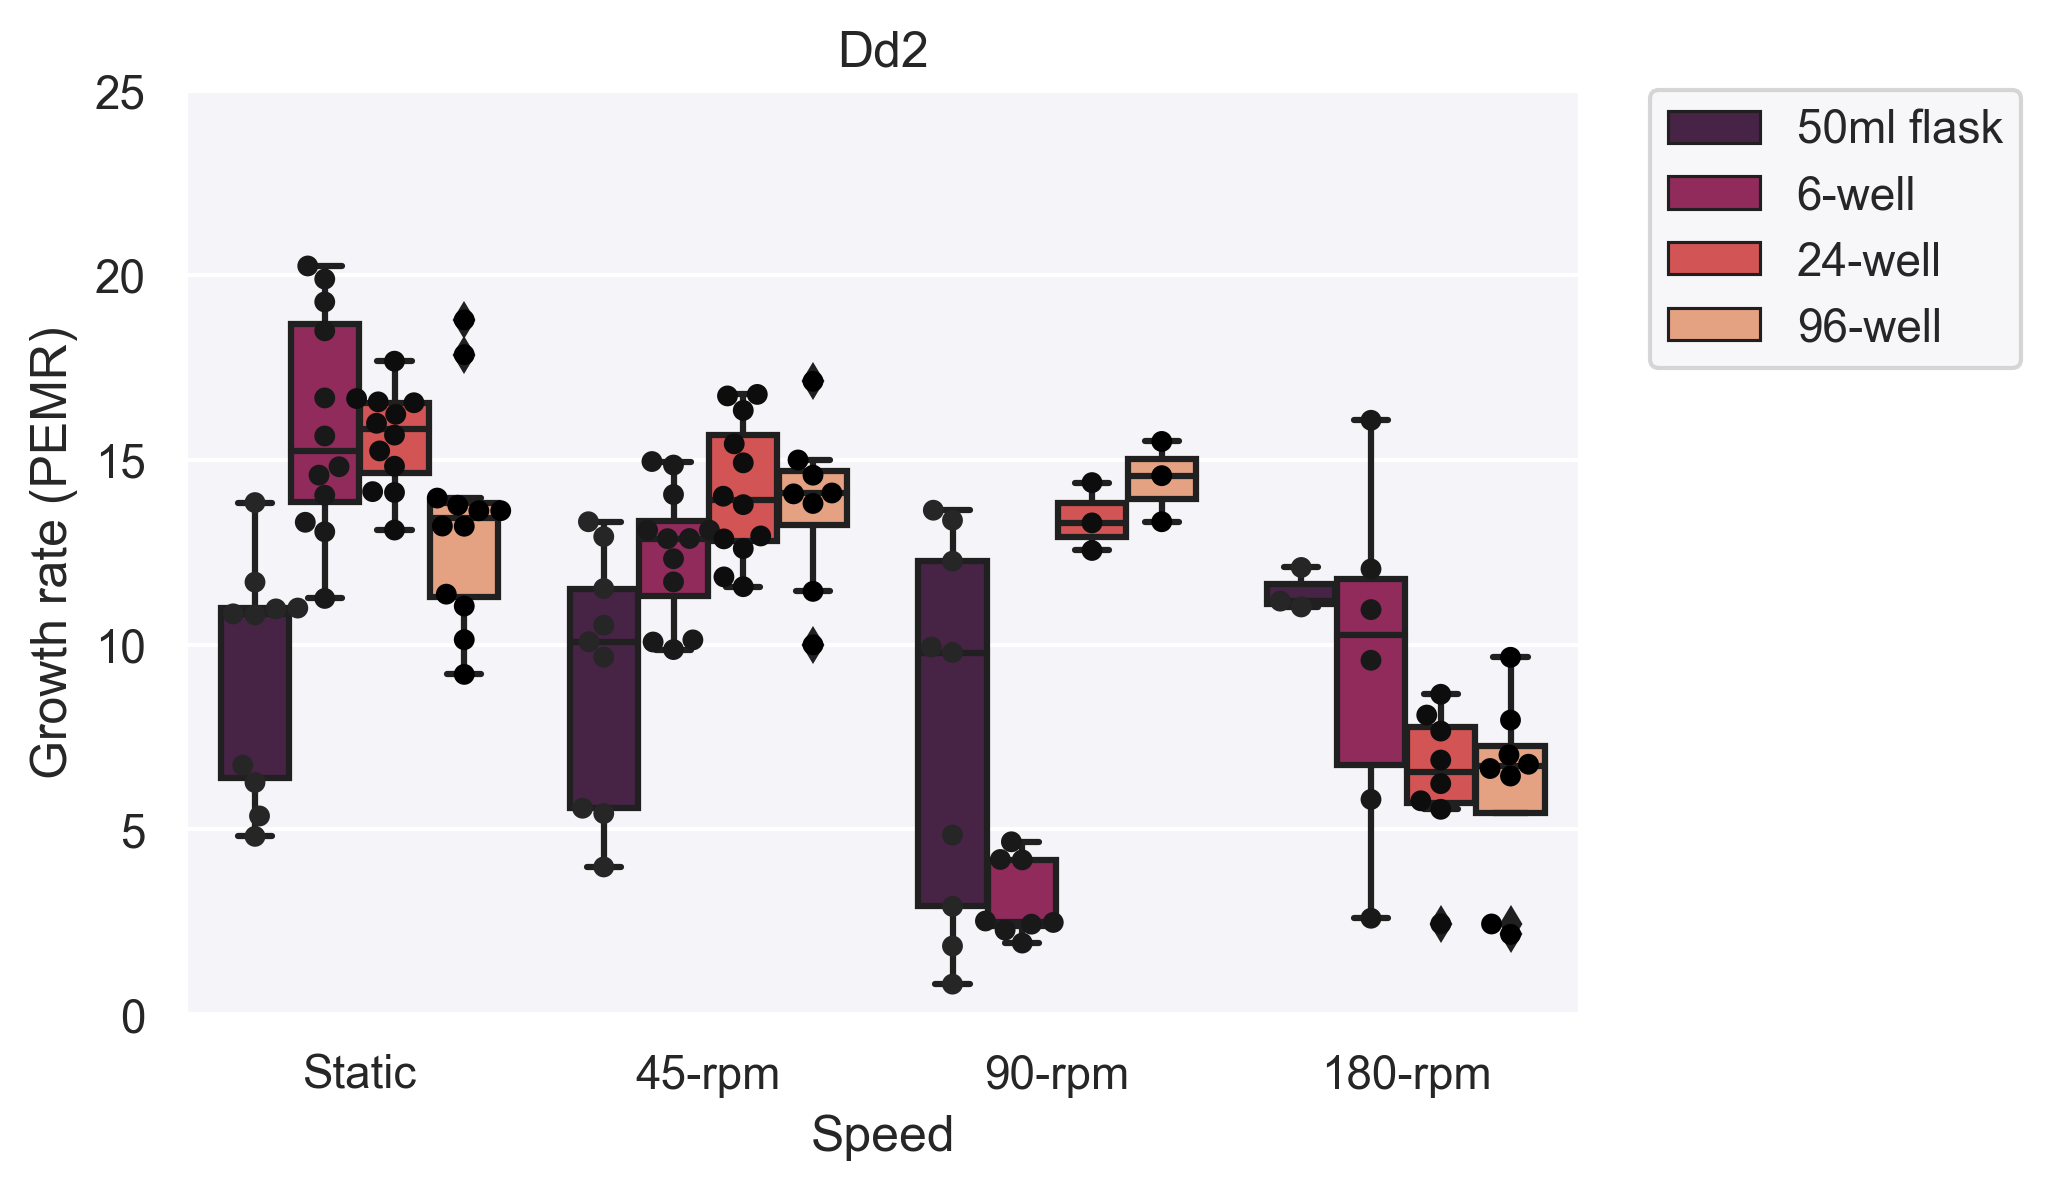

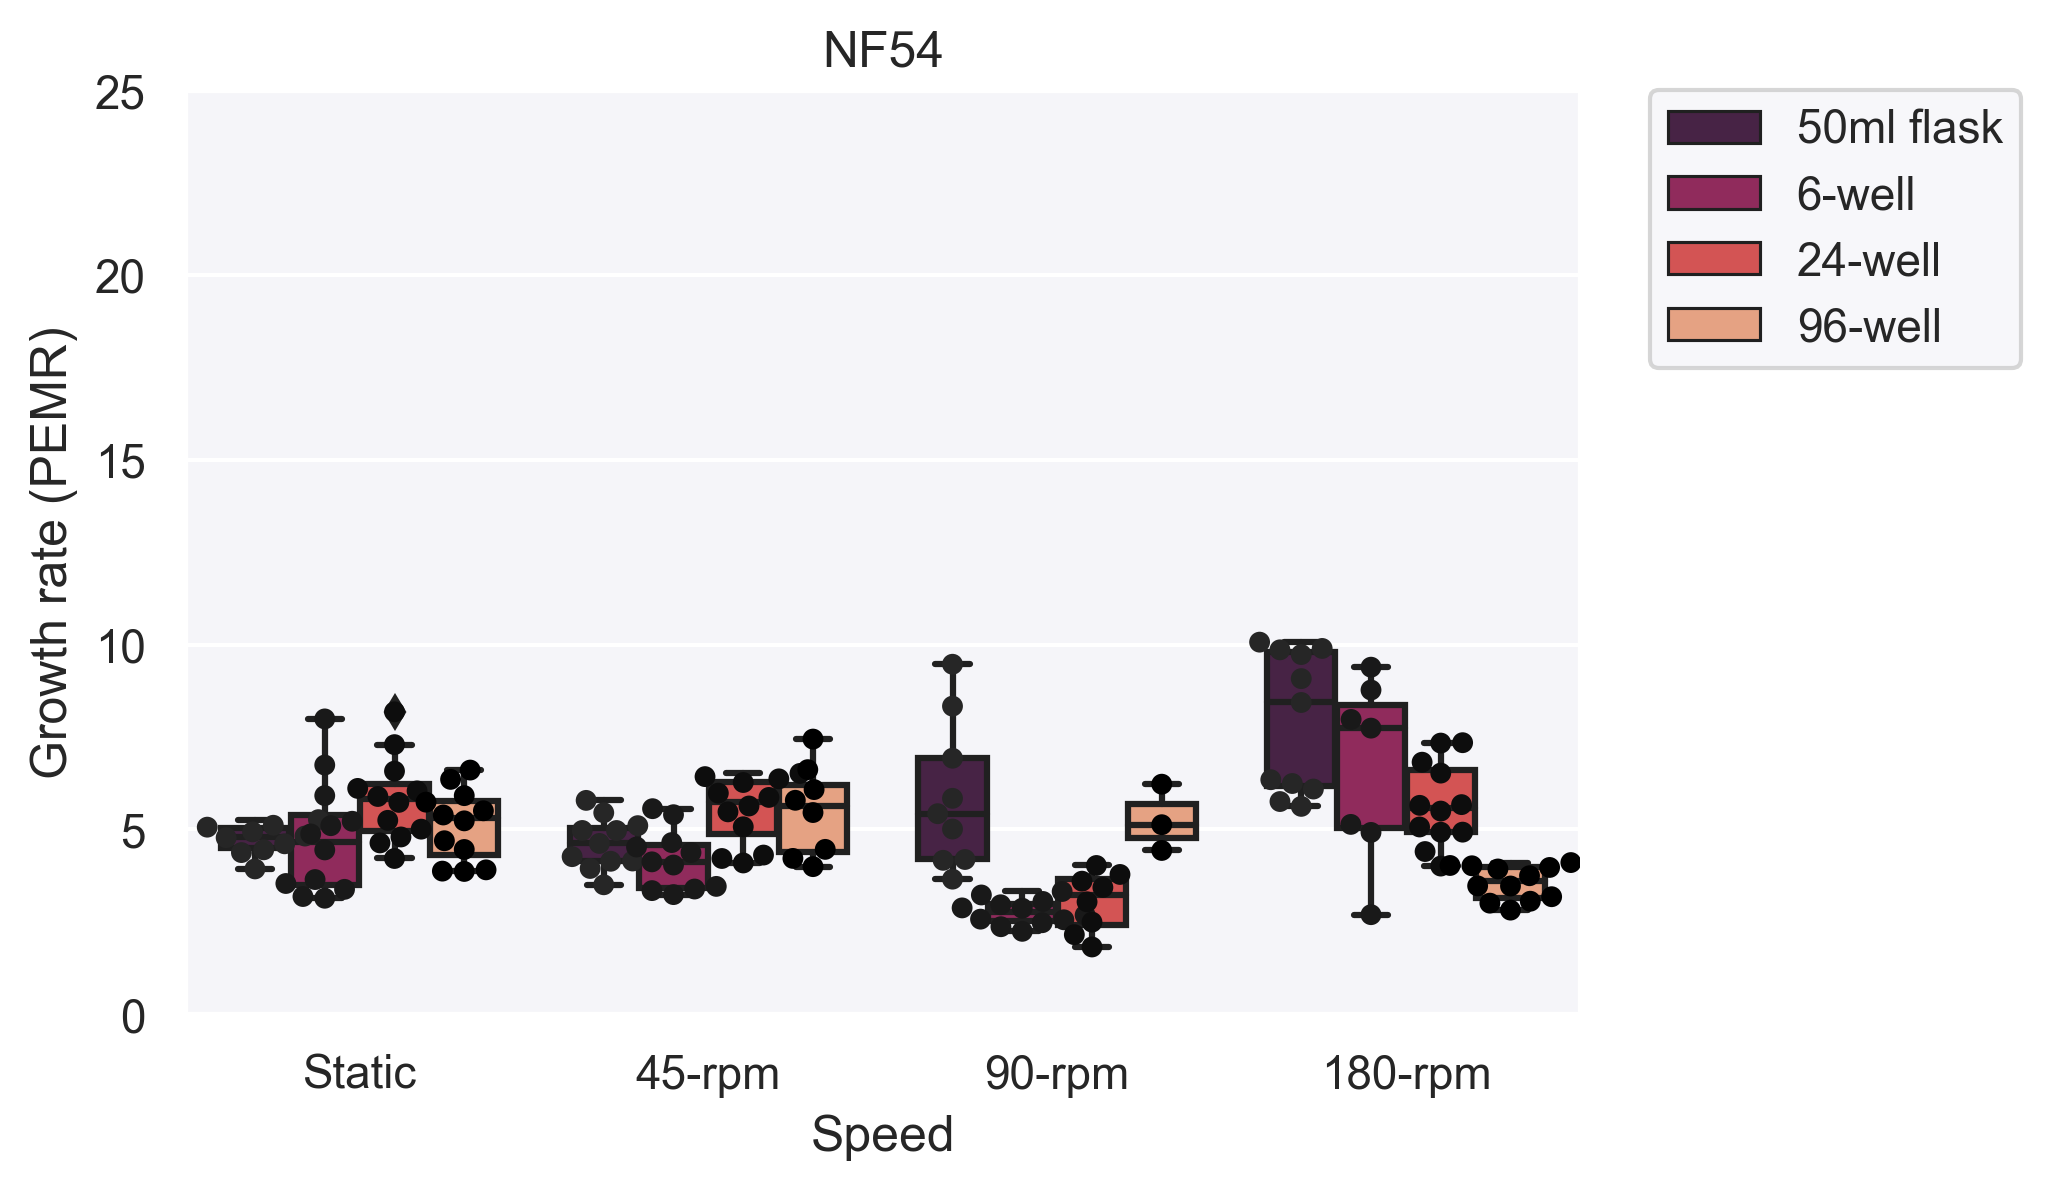

In [10]:
sns.set_theme(#context='notebook', 
            #style='ticks', 
            style='darkgrid', 
            font='arial', 
            font_scale=1) 
            #   color_codes=True, 
            #   rc=None)
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

for line, dfg in df3_melted.groupby('Line'):
    plt.figure(figsize=(6,4), dpi=300)
    sns.boxplot(x='Speed', order=GrowthAssayPlotlib.speed_order, y='Invasion rate', data=dfg, hue='Plate', hue_order=GrowthAssayPlotlib.plate_order, palette='rocket')
    sns.swarmplot(x='Speed', order=GrowthAssayPlotlib.speed_order, y='Invasion rate', data=dfg, hue='Plate', hue_order=GrowthAssayPlotlib.plate_order, color='black', dodge=True, size=5, legend=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(f'{line}')
    plt.ylim((0,MAX_INVASION_RATE_PLOT))
    #plt.ylim((0,25))
    plt.ylabel(GrowthAssayPlotlib.YLABEL)

    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig(os.path.join(output_folder_ga3, f'FIG Comparison plate {line}v3.svg'), bbox_inches='tight')
    # plt.close()

In [11]:
df3_melted_replicas_marked

,Plate number,Well position,Line,Clone,Strain,Speed,Plate,Repeat,Invasion rate,Parasitemia,IgnoreRepeat,AboveMaxParasitemia,AboveMaxInvasionRate
0,1,A1,NF54,,NF54,Static,6-well,Repeat 1,4.296296,0.378,True,False,False
1,2,A2,Dd2,,Dd2,Static,6-well,Repeat 1,5.550847,0.236,True,False,False
2,3,A3,NF54,,NF54,Static,6-well,Repeat 1,4.169312,0.378,True,False,False
3,4,A4,Dd2,,Dd2,Static,6-well,Repeat 1,5.605932,0.236,True,False,False
4,5,A5,NF54,,NF54,Static,6-well,Repeat 1,3.828042,0.378,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,92,H8,NF54,,NF54,180-rpm,50ml flask,Repeat 6,5.624413,0.852,False,False,False
572,93,H9,NF54,,NF54,180-rpm,50ml flask,Repeat 6,6.242838,0.733,False,False,False
573,94,H10,Dd2,,Dd2,180-rpm,50ml flask,Repeat 6,1.549053,2.375,False,True,False
574,95,H11,Dd2,,Dd2,180-rpm,50ml flask,Repeat 6,1.111568,2.187,False,True,False


In [19]:

#dfq = df.query(f'Plate == "6-well" and Hematocrit == "4%" and Strain == @filter_lines' )

def sem(data):
    return np.std(data, ddof=1) / np.sqrt(np.size(data))

for (Speed, Line, Plate), dft in dfg.groupby(['Speed','Line','Plate']):
    data = dft['Invasion rate']
    print(f'{Line}, {Speed}, {Plate}, {np.mean(data):.2f}, {sem(data):.2f}')


# print(filter_lines)
# df['Strain'].unique()


NF54, 180-rpm, 24-well, 5.68, 0.32
NF54, 180-rpm, 50ml flask, 7.92, 0.57
NF54, 180-rpm, 6-well, 6.66, 0.92
NF54, 180-rpm, 96-well, 3.57, 0.13
NF54, 45-rpm, 24-well, 5.52, 0.26
NF54, 45-rpm, 50ml flask, 4.63, 0.21
NF54, 45-rpm, 6-well, 4.19, 0.24
NF54, 45-rpm, 96-well, 5.51, 0.43
NF54, 90-rpm, 24-well, 3.04, 0.29
NF54, 90-rpm, 50ml flask, 5.89, 0.66
NF54, 90-rpm, 6-well, 2.77, 0.10
NF54, 90-rpm, 96-well, 5.26, 0.52
NF54, Static, 24-well, 5.81, 0.33
NF54, Static, 50ml flask, 4.73, 0.13
NF54, Static, 6-well, 4.77, 0.44
NF54, Static, 96-well, 5.13, 0.28


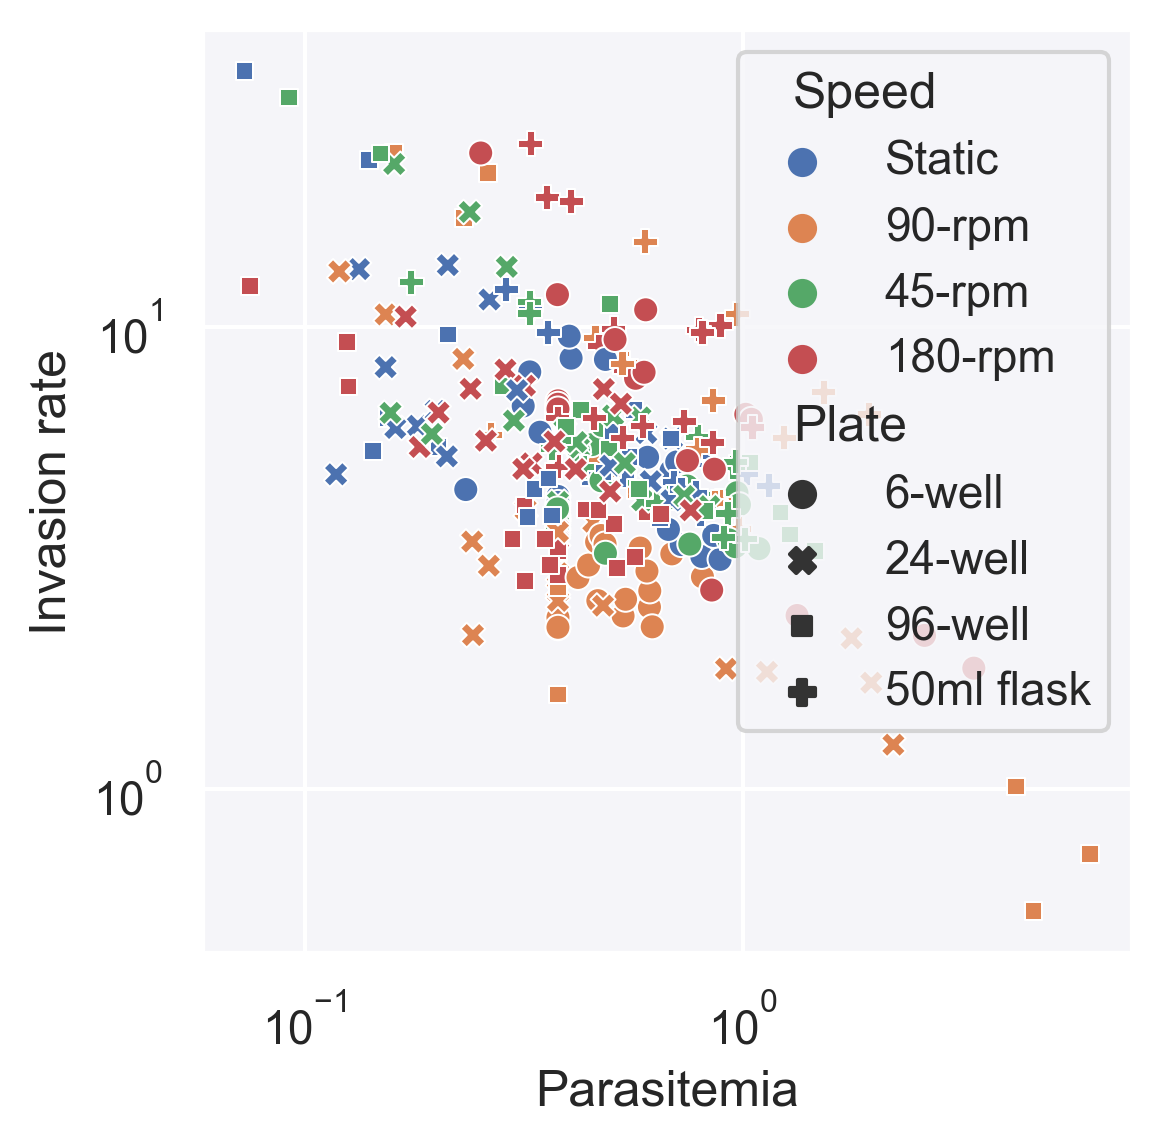

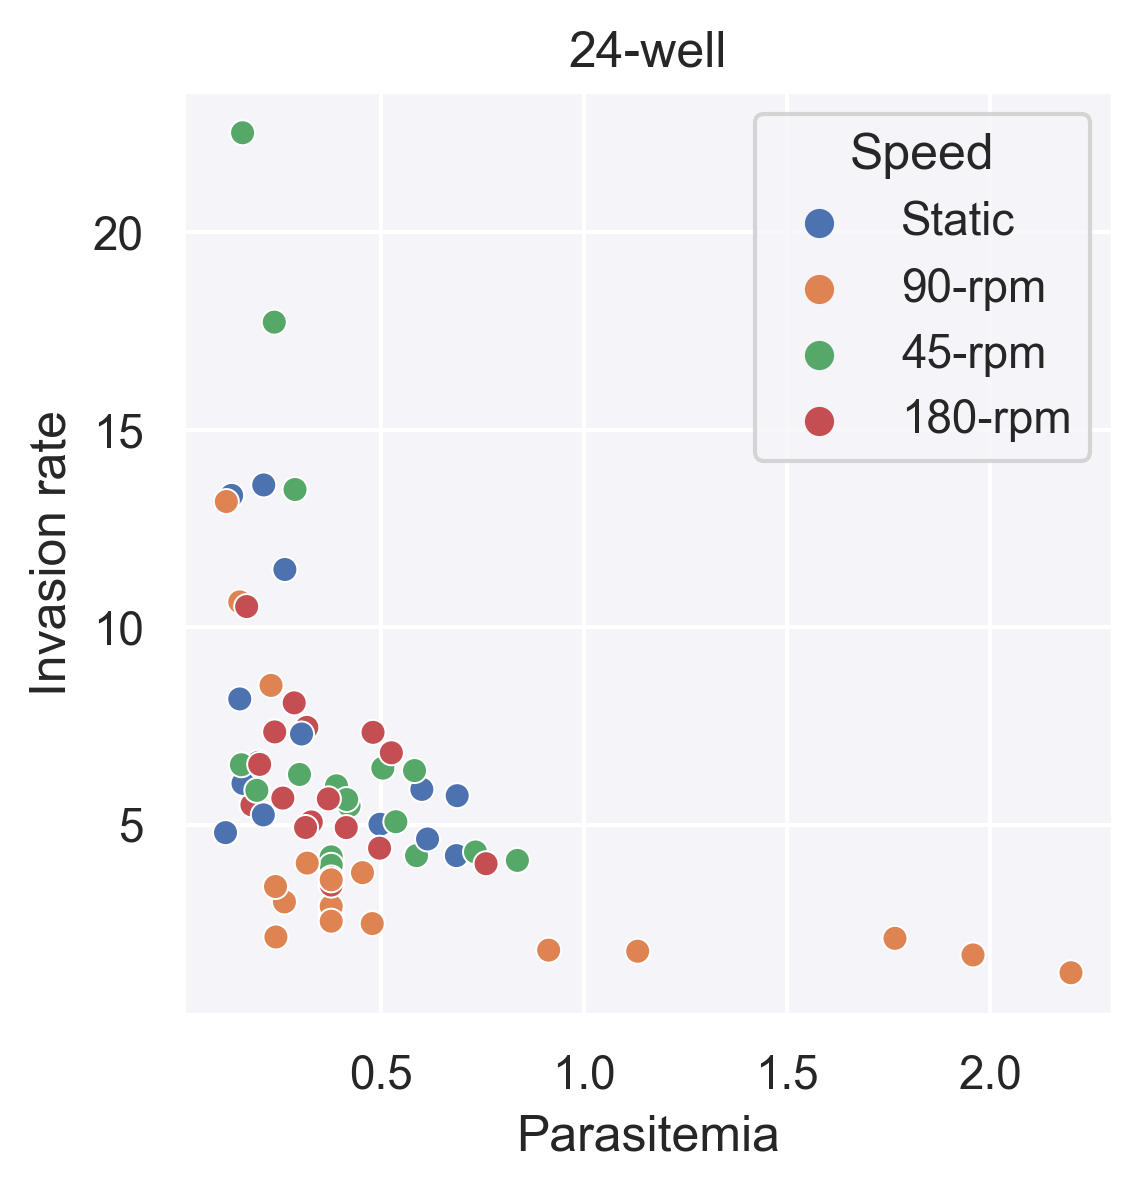

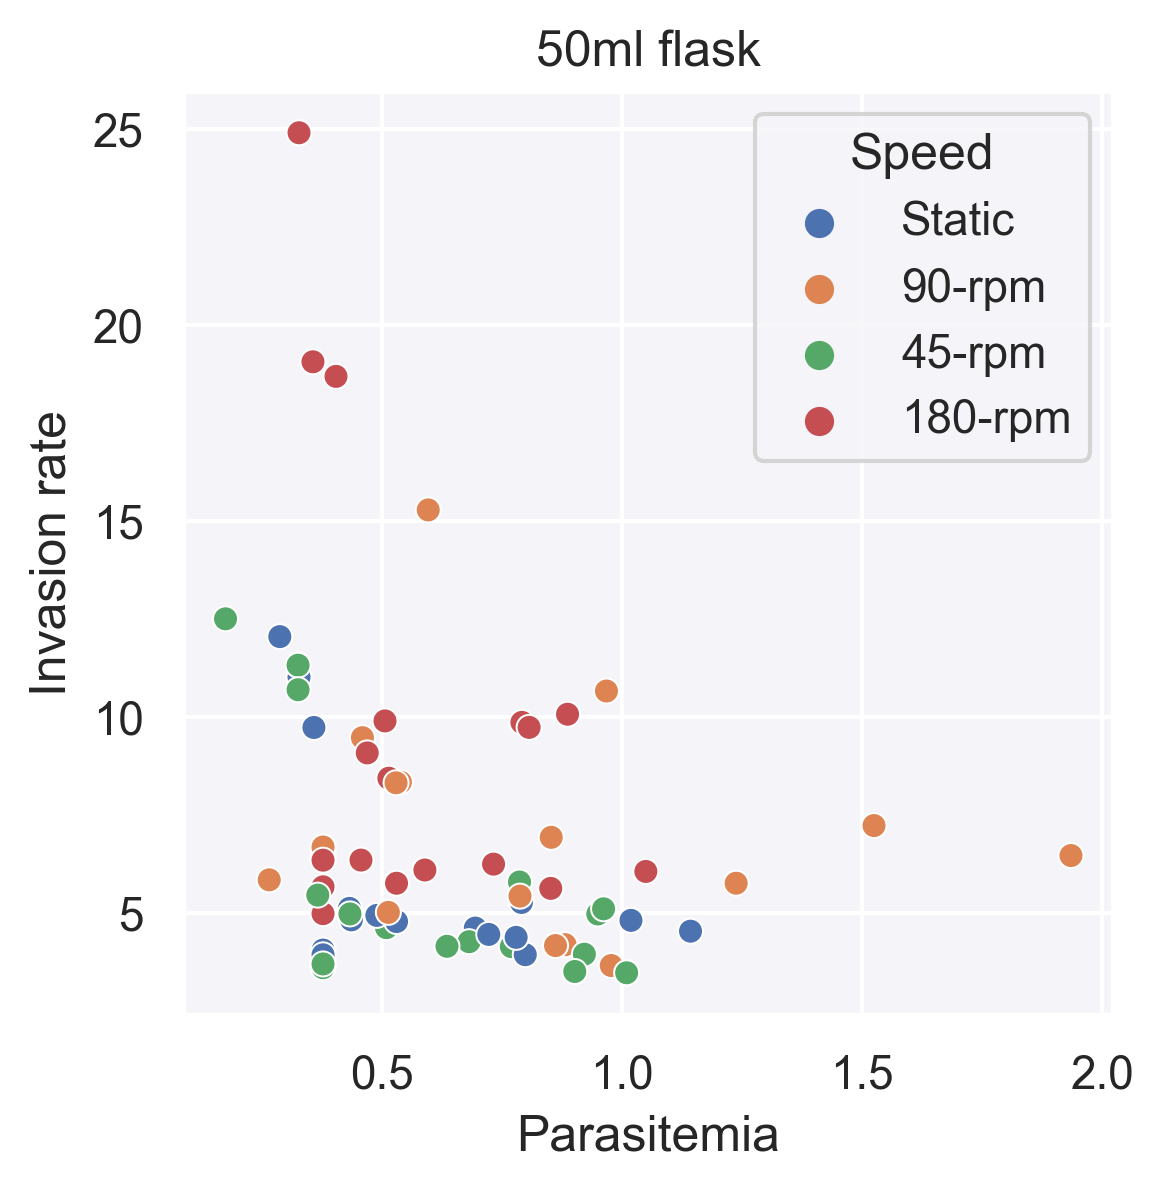

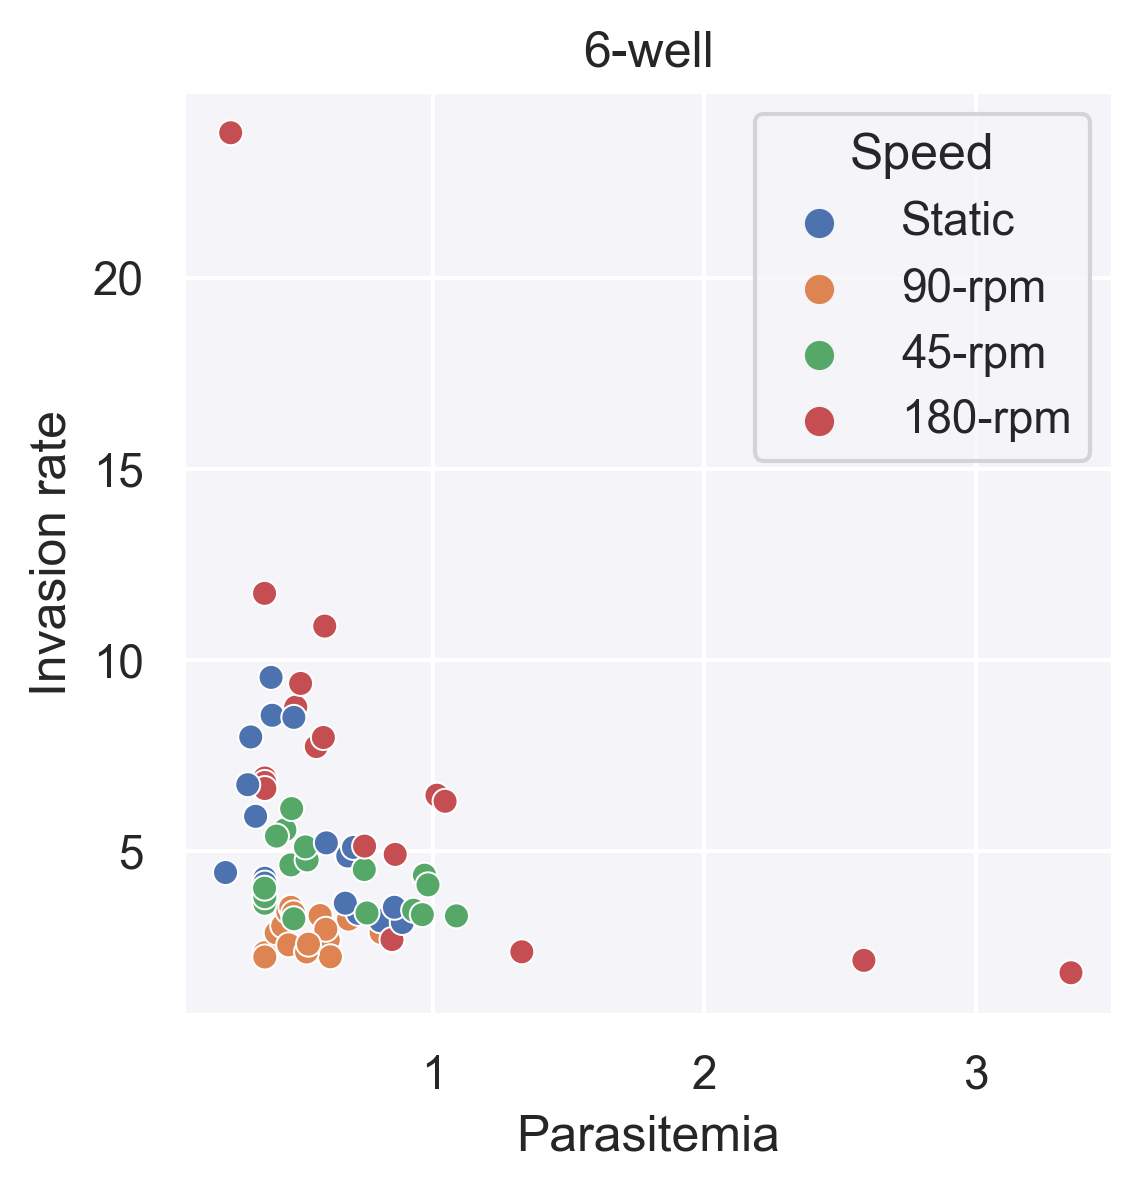

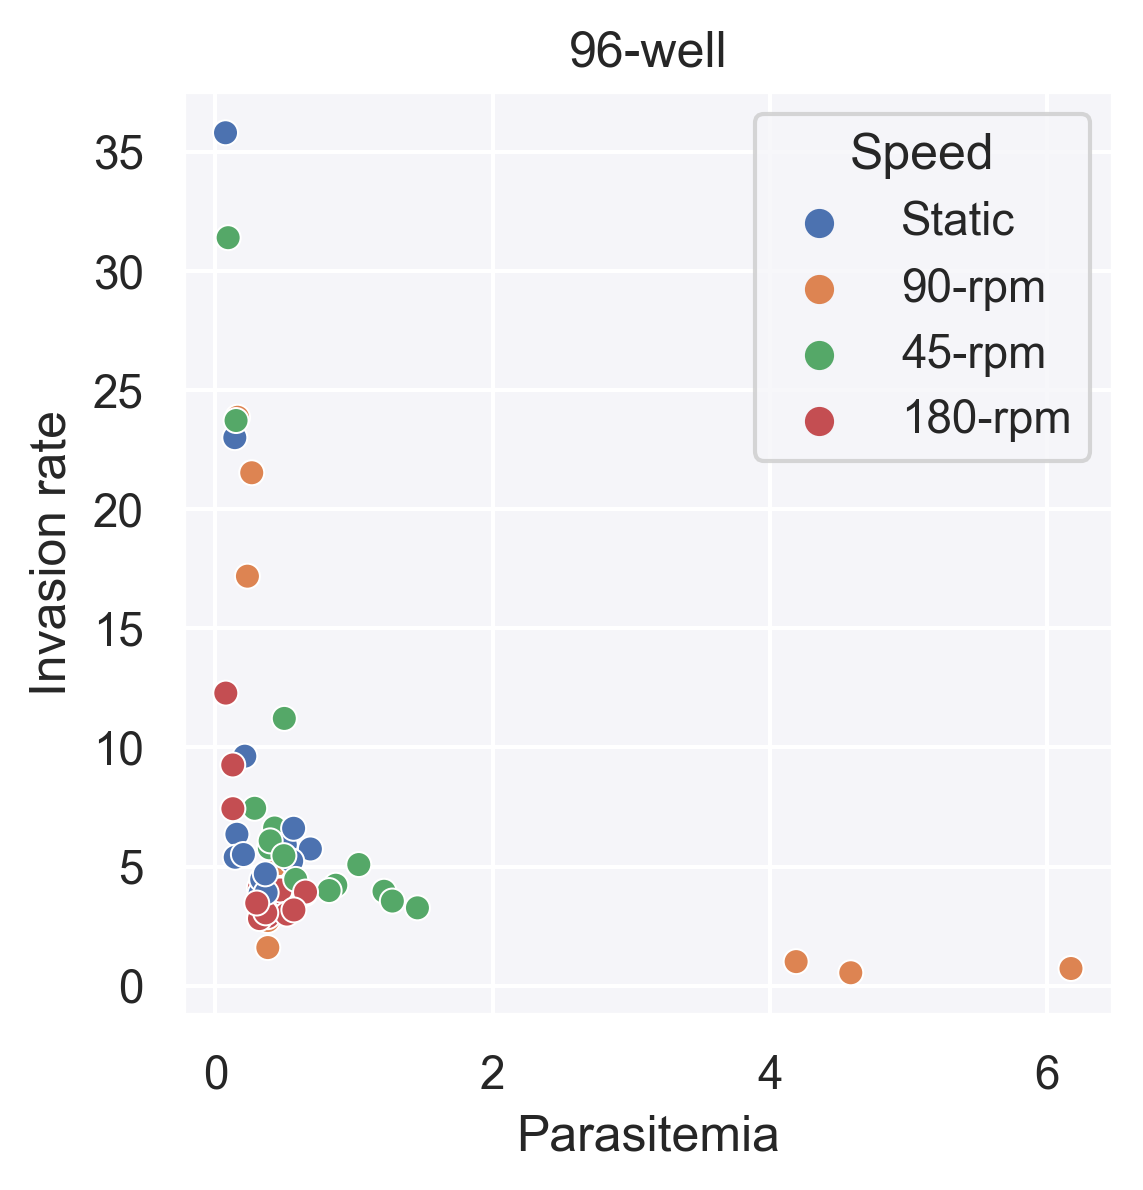

In [ ]:
plt.figure(figsize=(4,4), dpi=300)

dfq = df3_melted_replicas_marked.query('Strain == "NF54"')

sns.scatterplot(
    data=dfq,
    x='Parasitemia',
    y='Invasion rate',
    hue='Speed',
    style='Plate',
)
plt.loglog()

for plate, dfg in dfq.groupby('Plate'):
    plt.figure(figsize=(4,4), dpi=300)

    sns.scatterplot(
        data=dfg,
        x='Parasitemia',
        y='Invasion rate',
        hue='Speed',
    )
    plt.title(plate)
    # plt.loglog()